<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Code Library, Style and Links</h1>

[Version with SageMath Cells](https://olgabelitskaya.github.io/sklearn_cookbook_sagecells.html)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
span {font-family:'Roboto'; color:black; text-shadow: 5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color: royalblue;}      
</style>

In [2]:
import numpy,pandas,pylab,h5py,time,warnings,os
from sklearn import datasets,preprocessing,impute,cluster,mixture,manifold,dummy,linear_model,svm
from sklearn.feature_extraction import DictVectorizer 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.decomposition import PCA; from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,explained_variance_score
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier,DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier,NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor,GaussianProcessClassifier
from sklearn.gaussian_process.kernels import WhiteKernel,RationalQuadratic,RBF
from sklearn.semi_supervised import LabelPropagation,LabelSpreading
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPClassifier,BernoulliRBM,MLPRegressor

In [3]:
[warnings.filterwarnings('ignore',category=el) for el in [UserWarning,FutureWarning,DeprecationWarning]]
numpy.set_printoptions(precision=4); pylab.style.use('seaborn-whitegrid')
style_dict={'background-color':'gainsboro','color':'darkslategray','border-color':'white','font-family':'Roboto'}
def ohe(x): return preprocessing.OneHotEncoder(categories='auto').fit(x.reshape(-1,1))\
            .transform(x.reshape(-1,1)).toarray().astype('int16')
def sas(X,y): return train_test_split(X,y,test_size=0.2,random_state=1)
print(os.listdir("../input"))

['style-color-images', 'classification-of-handwritten-letters']


In [4]:
def classifier_fit_score(classifier,classifier_name,clf_dataset,x_train,x_test,y_train,y_test):
    classifier.fit(x_train,y_train); clf_datasets.append(clf_dataset)
    classifier_list.append(str(classifier)); classifier_names.append(classifier_name) 
    classifier.fit(x_train,y_train)    
    y_clf_train=classifier.predict(x_train); y_clf_test=classifier.predict(x_test)        
    acc_clf_train=round(accuracy_score(y_train,y_clf_train),4)
    acc_clf_test=round(accuracy_score(y_test,y_clf_test),4)
    acc_train.append(acc_clf_train); acc_test.append(acc_clf_test)   
    loss_clf_train=round(hamming_loss(y_train,y_clf_train),4)
    loss_clf_test=round(hamming_loss(y_test,y_clf_test),4)
    loss_train.append(loss_clf_train); loss_test.append(loss_clf_test)    
    return [y_clf_train,y_clf_test,acc_clf_train,acc_clf_test,loss_clf_train,loss_clf_test]
def get_classifier_results():
    return pandas.DataFrame({'classifier':classifier_list,'classifier_name':classifier_names,
                             'clf_dataset':clf_datasets,'acc_train':acc_train,
                             'acc_test':acc_test,'loss_train':loss_train,'loss_test':loss_test})       

In [5]:
def regressor_fit_score(regressor,regressor_name,dataset,x_train,x_test,y_train,y_test):
    regressor_list.append(str(regressor)); regressor_names.append(regressor_name); reg_datasets.append(dataset)    
    regressor.fit(x_train,y_train); y_reg_train=regressor.predict(x_train); y_reg_test=regressor.predict(x_test)    
    r2_reg_train=round(r2_score(y_train,y_reg_train),4); r2_train.append(r2_reg_train)
    r2_reg_test=round(r2_score(y_test,y_reg_test),4); r2_test.append(r2_reg_test)    
    ev_reg_train=round(explained_variance_score(y_train,y_reg_train),4); ev_train.append(ev_reg_train)
    ev_reg_test=round(explained_variance_score(y_test, y_reg_test),4); ev_test.append(ev_reg_test)    
    mse_reg_train=round(mean_squared_error(y_train,y_reg_train),4); mse_train.append(mse_reg_train)
    mse_reg_test=round(mean_squared_error(y_test,y_reg_test),4); mse_test.append(mse_reg_test)
    mae_reg_train=round(mean_absolute_error(y_train,y_reg_train),4); mae_train.append(mae_reg_train)
    mae_reg_test=round(mean_absolute_error(y_test,y_reg_test),4); mae_test.append(mae_reg_test)
    mdae_reg_train=round(median_absolute_error(y_train,y_reg_train),4); mdae_train.append(mdae_reg_train)
    mdae_reg_test=round(median_absolute_error(y_test,y_reg_test),4); mdae_test.append(mdae_reg_test)    
    return [y_reg_train,y_reg_test,r2_reg_train,r2_reg_test,ev_reg_train,ev_reg_test,
            mse_reg_train,mse_reg_test,mae_reg_train,mae_reg_test,mdae_reg_train,mdae_reg_test]
def get_regressor_results():
    return pandas.DataFrame({'regressor':regressor_list,'regressor_name':regressor_names,
                             'dataset':reg_datasets,'r2_train':r2_train,'r2_test':r2_test,
                             'ev_train':ev_train,'ev_test':ev_test,
                             'mse_train':mse_train,'mse_test':mse_test,
                             'mae_train':mae_train,'mae_test':mae_test,
                             'mdae_train':mdae_train,'mdae_test':mdae_test})

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Data</h1>
## internal datasets
[Dataset loading utilities](http://scikit-learn.org/stable/datasets/index.html#datasets)

In [6]:
boston=datasets.load_boston(); housing=datasets.fetch_california_housing()
digits=datasets.load_digits(); wine=datasets.load_wine();
faces=datasets.fetch_olivetti_faces()
train=datasets.fetch_20newsgroups(subset='train',shuffle=True,remove=('headers','footers','quotes'))
test=datasets.fetch_20newsgroups(subset='test',shuffle=True,remove=('headers','footers','quotes'))
[X1,y1,X2,y2,X3,y3,X4,y4,X5,y5]=\
[boston.data,boston.target,housing.data,housing.target,digits.data,digits.target,
wine.data,wine.target,faces.data,faces.target]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /tmp/scikit_learn_data


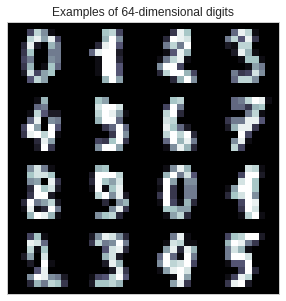

In [7]:
# Image examples
n=4; img=numpy.zeros((10*n,10*n))
for i in range(n): 
    for j in range(n): img[(10*i+1):(10*i+9),(10*j+1):(10*j+9)]=X3[i*n+j].reshape((8,8))
pylab.figure(figsize=(5,5)); pylab.imshow(img,cmap=pylab.cm.bone)
pylab.title('Examples of 64-dimensional digits')
pylab.xticks([]); pylab.yticks([]); pylab.show()

## artificial datasets

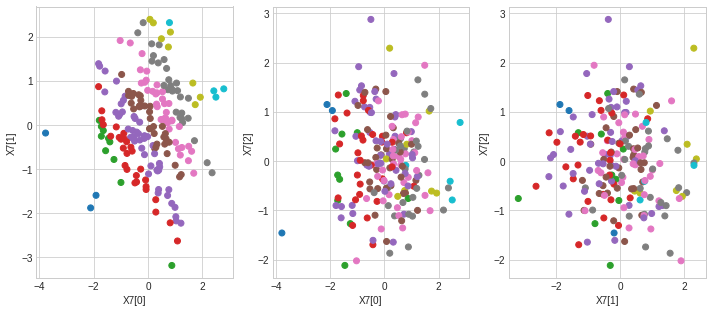

In [8]:
# 5000x3 matrix, 3 features (2 responsible for targets), 1 target, 0.97 - the bias factor
[X7,y7]=datasets.make_regression(5000,3,2,1,0.97)
f,ax=pylab.subplots(ncols=3,figsize=(12,5)); k=[[0,1],[0,2],[1,2]]
[ax[i].scatter(X7[:200,k[i][0]], X7[:200,k[i][1]],c=y7[:200],cmap=pylab.cm.tab10) for i in range(3)]
[ax[i].set_xlabel('X7[%d]'%k[i][0]) for i in range(3)]; [ax[i].set_ylabel('X7[%d]'%k[i][1]) for i in range(3)]
pylab.show()
# 5000x10 matrix, 10 features (8 - responsible for targets), 2 targets, 0.7 - the bias factor, 10.0 - the noise
[X8,y8]=datasets.make_regression(5000,10,8,2,0.7,noise=10.0)

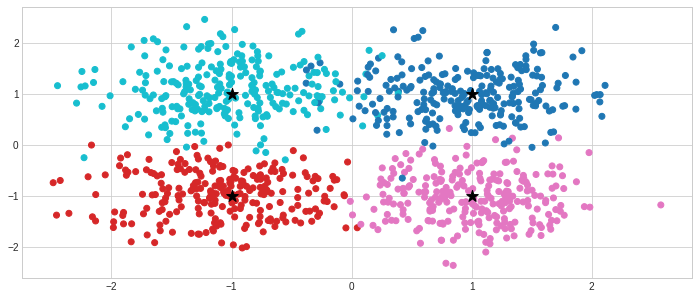

In [9]:
# Gaussian blobs for clustering, 1000 data points, 4 clusters
[X9,y9]=datasets.make_blobs(n_samples=1000,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],cluster_std=0.5)
pylab.figure(figsize=(12,5)); pylab.scatter(X9[:,0],X9[:,1],c=y9,cmap=pylab.cm.tab10)
pylab.scatter([1,-1,1,-1],[1,-1,-1,1],c='black',marker='*',s=150); pylab.show()

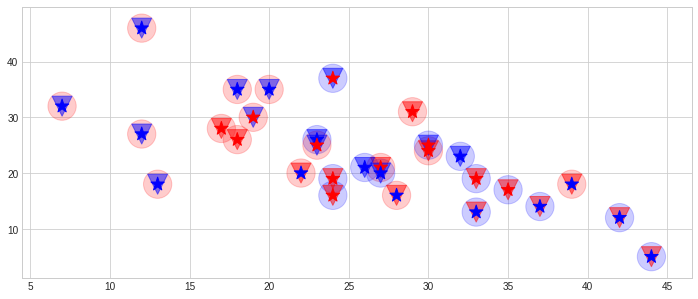

In [10]:
# 5000 data points, 2 features, 1 target with 3 labels
[X10,y10]=datasets.make_multilabel_classification(n_classes=3,n_samples=5000,n_features=2)
f,ax=pylab.subplots(1,figsize=(12,5)); m=['o','v','*']; a=[0.2,0.5,1]; s=[800,400,200]
[ax.scatter(X10[:30,0],X10[:30,1],c=y10[:30,i],marker=m[i],alpha=a[i],cmap=pylab.cm.bwr,s=s[i]) for i in range(3)]
pylab.show()

## external datasets

б


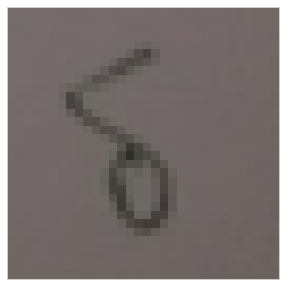

In [11]:
# Classification. Handwritten letters
# Read the h5 file
f=h5py.File('../input/classification-of-handwritten-letters/LetterColorImages_123.h5','r')
keys=list(f.keys())
# Create features and targets
letters=u'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
backgrounds=numpy.array(f[keys[0]]); targets=numpy.array(f[keys[2]])
letter_images=numpy.array(f[keys[1]])/255
print(letters[targets[2000]-1])
pylab.figure(figsize=(5,5)); pylab.xticks([]); pylab.yticks([]); 
pylab.imshow(letter_images[2000]); pylab.show()

3 2


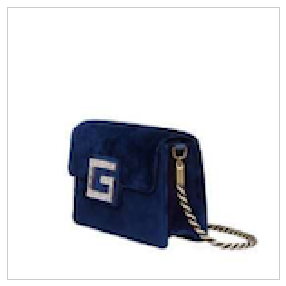

In [12]:
# Classification. Brand & Products
# Read the h5 file
f=h5py.File('../input/style-color-images/StyleColorImages.h5','r')
keys=list(f.keys())
# Create features and targets
brands=numpy.array(f[keys[0]]); products=numpy.array(f[keys[2]])
style_images=numpy.array(f[keys[1]])/255
print(brands[1000],products[1000]) 
pylab.figure(figsize=(5,5)); pylab.xticks([]); pylab.yticks([]); 
pylab.imshow(style_images[1000]); pylab.show()

In [13]:
# 28x28 grayscale images; 60,000 - the train set; 10,000 - the test set; labeled over 10 categories
from keras.datasets import mnist
(X_train11,y_train11),(X_test11,y_test11)=mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Extraction and Preprocessing</h1>
## extraction

[[ 0  0  0  1  0  0 33]
 [ 0  0  1  0  0  0 16]
 [ 0  0  0  0  1  0 28]
 [ 0  0  0  0  0  1 38]
 [ 0  1  0  0  0  0 17]
 [ 1  0  0  0  0  0 27]]
['city=Ankara', 'city=Barcelona', 'city=Frankfurt', 'city=Hanoi', 'city=Houston', 'city=Riyadh', 'temperature']


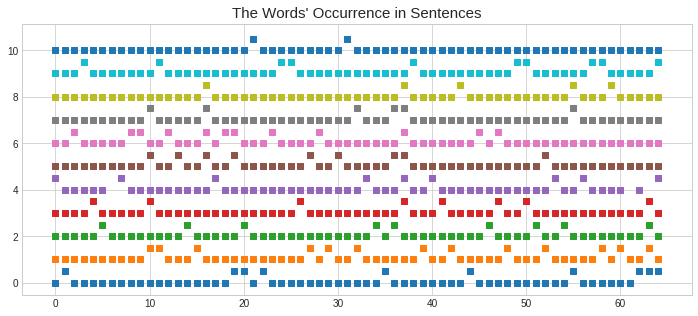

['have', 'you', 'already', 'set', 'your', 'goals', 'for', 'the', 'new', 'year']


In [14]:
# Basic examples
temperature=[{'city':'Hanoi','temperature':33.},{'city':'Frankfurt','temperature':16.},
             {'city':'Houston','temperature':28.},
             {'city':'Riyadh','temperature':38.},{'city':'Barcelona','temperature':17.},
             {'city':'Ankara','temperature':27.}]
corpus=['Have you already set your goals for the New Year?',
        'Do you want to lose ten kilos, run a marathon or speak fluent English?', 
        'Some experts believe that you need systems, not goals.','A system is something you do on a regular basis.',
        'This means focusing on what you can control (your actions) rather than what you can’t.',
        'For example, do not focus on losing ten kilos.',
        'Focus on shopping for healthy food and cooking something light every day.',
        'Do not focus on the marathon.','Focus on the training schedule.',
        'Invent a system to improve your English, one step at a time.','Good luck!']
dv=DictVectorizer(); temperature_features=dv.fit_transform(temperature).toarray().astype('int16')
print(temperature_features); print(dv.get_feature_names())
cv=CountVectorizer(min_df=1); corpus_features=cv.fit_transform(corpus)
corpus_array=corpus_features.toarray().astype('int16'); c_analyzer=cv.build_analyzer()
pylab.figure(figsize=(12,5))
for i in range(len(corpus_array)): pylab.scatter(range(len(corpus_array[i])),(corpus_array[i]*0.5+i),marker='s')
pylab.title("The Words' Occurrence in Sentences",fontsize=15); pylab.show()
print(c_analyzer(corpus[0]))

In [15]:
vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words='english')
X_train6=vectorizer.fit_transform(train.data); X_test6=vectorizer.transform(test.data)
y_train6,y_test6=train.target,test.target
del train,test

## scaling

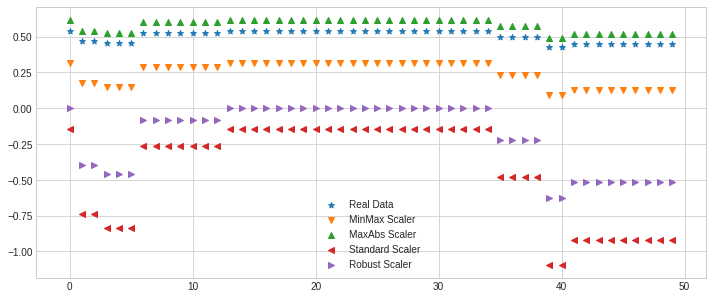

In [16]:
# Applying scalers
SCX1=[X1,preprocessing.MinMaxScaler().fit_transform(X1),preprocessing.MaxAbsScaler().fit_transform(X1),
      preprocessing.StandardScaler().fit_transform(X1),preprocessing.RobustScaler().fit_transform(X1)]
n=50; pylab.figure(figsize=(12,5)); m=['*','v','^','<','>']
labels=['Real Data','MinMax Scaler','MaxAbs Scaler','Standard Scaler','Robust Scaler']
for i in range(5): pylab.scatter(range(n),SCX1[i][:n,4],marker=m[i],label=labels[i])
pylab.legend(loc=8); pylab.show()

## one-hot encoding

In [17]:
# Encoding categorical variables 
cat_brands,cat_products,cat_backgrounds,cat_targets=ohe(brands),ohe(products),ohe(backgrounds),ohe(targets)
print(targets[99:102]); print('=>'); print(cat_targets[99:102])

[2 3 3]
=>
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## imputation of missing values

In [18]:
# Basic examples
x1_train=[[0,17],[numpy.nan,4],[1,7],[3,numpy.nan],[5,12],[10,25]]
x1_test=[[numpy.nan,5],[3,15],[8,numpy.nan],[4,11]]
# mean & median imputers, custom transformer (log)
mean_imp=impute.SimpleImputer(strategy='mean'); median_imp=impute.SimpleImputer(strategy='median')
log_trans=preprocessing.FunctionTransformer(numpy.log1p,validate=False)
mean_imp.fit(x1_train); median_imp.fit(x1_train)
x1_train_log=log_trans.transform(median_imp.transform(x1_train))
x1_test_log=log_trans.transform(median_imp.transform(x1_test))
for el in [x1_test,mean_imp.transform(x1_test),median_imp.transform(x1_test),x1_test_log]:
    print(el)

[[nan, 5], [3, 15], [8, nan], [4, 11]]
[[ 3.8  5. ]
 [ 3.  15. ]
 [ 8.  13. ]
 [ 4.  11. ]]
[[ 3.  5.]
 [ 3. 15.]
 [ 8. 12.]
 [ 4. 11.]]
[[1.3863 1.7918]
 [1.3863 2.7726]
 [2.1972 2.5649]
 [1.6094 2.4849]]


## features' importance

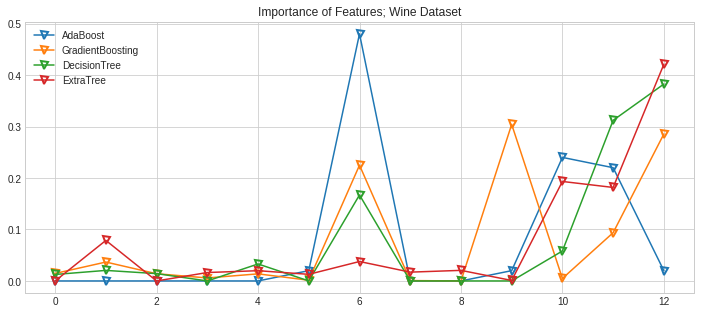

In [19]:
classifiers=[AdaBoostClassifier,GradientBoostingClassifier,DecisionTreeClassifier,ExtraTreeClassifier]
labels=['AdaBoost','GradientBoosting','DecisionTree','ExtraTree']
pylab.figure(figsize=(12,5)); df_importance=pandas.DataFrame(columns=range(13))
for i in range(4):
    df_importance.loc[i]=classifiers[i]().fit(X4,y4).feature_importances_
    pylab.plot(df_importance.loc[i],'-v',label=labels[i],markersize=7,markerfacecolor="None",markeredgewidth=2)
pylab.legend(loc=2,fontsize=10); pylab.title("Importance of Features; Wine Dataset"); pylab.show()

## dimensionality reduction
Univariate Selection, Recursive Feature Elimination, Principal Component Analysis, etc.

In [20]:
# Univariate Selection; Wine Dataset
select_kbest=SelectKBest(score_func=chi2,k=4); fit_select_kbest=select_kbest.fit(X4,y4)
features_select_kbest=fit_select_kbest.transform(X4)
print(("Kbest scores: \n%s")%fit_select_kbest.scores_)
print(("Selected features: \n%s")%features_select_kbest[0:5,:])
# Recursive Feature Elimination; Wine Dataset
rfe=RFE(linear_model.LogisticRegression(solver='liblinear',multi_class='ovr'),3); fit_rfe=rfe.fit(X4,y4)
print(("RFE Selected Features: \n%s")%fit_rfe.support_)
print(("Feature Ranking: \n%s")%fit_rfe.ranking_)
# Principal Component Analysis; Boston Dataset
pca3=PCA(n_components=3); fit_pca=pca3.fit(X1)
print(("Explained Variance: \n%s\n")%fit_pca.explained_variance_ratio_)
print(fit_pca.components_[0],'\n'); print(fit_pca.components_[1],'\n')
print(fit_pca.components_[2])

Kbest scores: 
[5.4455e+00 2.8069e+01 7.4338e-01 2.9384e+01 4.5026e+01 1.5623e+01
 6.3334e+01 1.8155e+00 9.3683e+00 1.0902e+02 5.1825e+00 2.3390e+01
 1.6540e+04]
Selected features: 
[[ 127.      3.06    5.64 1065.  ]
 [ 100.      2.76    4.38 1050.  ]
 [ 101.      3.24    5.68 1185.  ]
 [ 113.      3.49    7.8  1480.  ]
 [ 118.      2.69    4.32  735.  ]]
RFE Selected Features: 
[False False False False False False  True False False  True  True False
 False]
Feature Ranking: 
[ 9  5  2  4 10  8  1  7  6  1  1  3 11]
Explained Variance: 
[0.8058 0.1631 0.0213]

[ 2.9297e-02 -4.3590e-02  2.8331e-02 -5.5585e-05  4.4972e-04 -1.1682e-03
  8.3634e-02 -6.5616e-03  4.5005e-02  9.4974e-01  5.6001e-03 -2.9122e-01
  2.2943e-02] 

[ 6.6685e-03  1.1756e-03 -4.9498e-03 -1.0268e-04  1.8207e-06  3.6575e-04
 -5.7225e-03  3.5369e-04 -8.6187e-03 -2.9241e-01 -2.5290e-03 -9.5618e-01
  5.7672e-03] 

[-0.0115  0.6329 -0.0883 -0.001  -0.0018  0.0047 -0.7559  0.0451  0.0028
  0.0939 -0.0112 -0.0236 -0.0928]


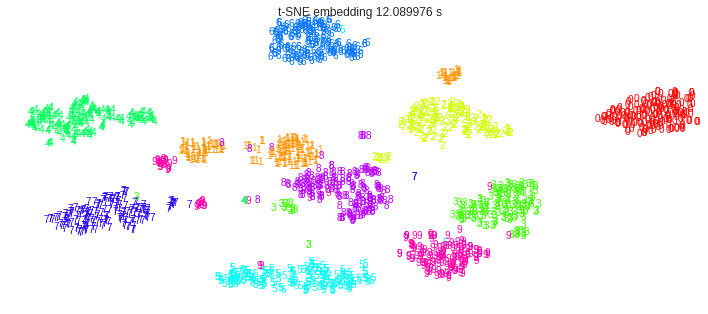

In [21]:
t0=time.time(); X_emb=manifold.TSNE(n_components=2,learning_rate=700.0).fit_transform(X3)
x_min,x_max=numpy.min(X_emb,0),numpy.max(X_emb,0); X_emb=(X_emb-x_min)/(x_max-x_min)
f,ax=pylab.subplots(1,figsize=(12,5)); pylab.axis("off")
for i in range(X_emb.shape[0]):
    pylab.text(X_emb[i,0],X_emb[i,1],str(y3[i]),color=pylab.cm.hsv(y3[i]/10.))
pylab.title("t-SNE embedding %f s"%(time.time()-t0)); pylab.show()

## shuffling and splitting

In [22]:
Xy=[sas(X1,y1),sas(X2,y2),sas(X3,y3),sas(X4,y4),sas(X5,y5)]
[[X_train1,X_test1,y_train1,y_test1],[X_train2,X_test2,y_train2,y_test2],
 [X_train3,X_test3,y_train3,y_test3],[X_train4,X_test4,y_train4,y_test4],
 [X_train5,X_test5,y_train5,y_test5]]=Xy
[print([Xy[i][j].shape for j in range(4)]) for i in range(5)]
print('boston, housing, digits, wine, faces')
del X1,y1,X2,y2,X3,y3,X4,y4,X5,y5

[(404, 13), (102, 13), (404,), (102,)]
[(16512, 8), (4128, 8), (16512,), (4128,)]
[(1437, 64), (360, 64), (1437,), (360,)]
[(142, 13), (36, 13), (142,), (36,)]
[(320, 4096), (80, 4096), (320,), (80,)]
boston, housing, digits, wine, faces


In [23]:
Xy2=[sas(X7,y7),sas(X8,y8),sas(X9,y9),sas(X10,y10)]
[[X_train7,X_test7,y_train7,y_test7],[X_train8,X_test8,y_train8,y_test8],
 [X_train9,X_test9,y_train9,y_test9],[X_train10,X_test10,y_train10,y_test10]]=Xy2
[print([Xy2[i][j].shape for j in range(4)]) for i in range(4)]
print('toy datasets: regression, regression 2, blobs, classification')
del X7,y7,X8,y8,X9,y9,X10,y10

[(4000, 3), (1000, 3), (4000,), (1000,)]
[(4000, 10), (1000, 10), (4000, 2), (1000, 2)]
[(800, 2), (200, 2), (800,), (200,)]
[(4000, 2), (1000, 2), (4000, 3), (1000, 3)]
toy datasets: regression, regression 2, blobs, classification


In [24]:
Xy3=[sas(letter_images,targets),sas(style_images,brands),sas(style_images,products)]
[[X_train12,X_test12,y_train12,y_test12],[X_train13,X_test13,y_train13,y_test13],
 [X_train14,X_test14,y_train14,y_test14]]=Xy3
[print([Xy3[i][j].shape for j in range(4)]) for i in range(3)]
print('letters and labels, style images and brands, style images and products')
del letter_images,targets,backgrounds,style_images,brands,products

[(11352, 32, 32, 3), (2838, 32, 32, 3), (11352,), (2838,)]
[(1747, 150, 150, 3), (437, 150, 150, 3), (1747,), (437,)]
[(1747, 150, 150, 3), (437, 150, 150, 3), (1747,), (437,)]
letters and labels, style images and brands, style images and products


<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Supervised Learning. Classification</h1>

In [25]:
classifier_list,classifier_names,clf_datasets=[],[],[]
acc_train,acc_test,loss_train,loss_test=[],[],[],[]
df_list=['classifier_name','acc_train','acc_test','loss_train','loss_test']
clf=[linear_model.LogisticRegression(solver='liblinear',multi_class='ovr'),
     linear_model.LogisticRegressionCV(solver='liblinear',multi_class='ovr'),
     linear_model.SGDClassifier(max_iter=1000,tol=0.00001),
     linear_model.RidgeClassifier(),linear_model.RidgeClassifierCV(),
     LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),
     svm.LinearSVC(),svm.SVC(gamma='scale',C=10.0,kernel='poly'),svm.NuSVC(gamma='scale',kernel='poly'),
     KNeighborsClassifier(),RadiusNeighborsClassifier(radius=30),NearestCentroid(),
     DecisionTreeClassifier(),ExtraTreeClassifier(),GaussianNB(),BernoulliNB(),MultinomialNB(),
     BaggingClassifier(),RandomForestClassifier(n_estimators=64),
     AdaBoostClassifier(),GradientBoostingClassifier(),
     linear_model.Perceptron(max_iter=1000,tol=0.00001),
     linear_model.PassiveAggressiveClassifier(max_iter=1000,tol=0.00001),
     GaussianProcessClassifier(),LabelPropagation(),LabelSpreading()]

In [26]:
list3clf=['LogisticRegression','LogisticRegressionCV','SGDClassifier','RidgeClassifier', 'RidgeClassifierCV',
          'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis','LinearSVC', 'SVC','NuSVC',
          'KNeighborsClassifier','RadiusNeighborsClassifier','NearestCentroid', 
          'DecisionTreeClassifier','ExtraTreeClassifier',
          'GaussianNB','BernoulliNB','MultinomialNB','BaggingClassifier','RandomForestClassifier',
          'AdaBoostClassifier','GradientBoostingClassifier','Perceptron','PassiveAggressiveClassifier']
y3clf=[]
for i in range(len(list3clf)):
    y3clf.append(classifier_fit_score(clf[i],list3clf[i],'Digits',X_train3,X_test3,y_train3,y_test3)[:2])
[[y_train31,y_test31],[y_train32,y_test32],[y_train33,y_test33],[y_train34,y_test34],[y_train35,y_test35],
[y_train36,y_test36],[y_train37,y_test37],[y_train38,y_test38],[y_train39,y_test39],[y_train310,y_test310],
[y_train311,y_test311],[y_train312,y_test312],[y_train313,y_test313],[y_train314,y_test314],[y_train315,y_test315],
[y_train316,y_test316],[y_train317,y_test317],[y_train318,y_test318],[y_train319,y_test319],[y_train320,y_test320],
[y_train321,y_test321],[y_train322,y_test322],[y_train323,y_test323],[y_train324,y_test324]]=y3clf
y_train925,y_test925=classifier_fit_score(clf[24],'GaussianProcessClassifier','Toy Blobs',
                                          X_train9,X_test9,y_train9,y_test9)[:2]
y_train926,y_test926=classifier_fit_score(clf[25],'LabelPropagation','Toy Blobs',
                                          X_train9,X_test9,y_train9,y_test9)[:2]
y_train927,y_test927=classifier_fit_score(clf[26],'LabelSpreading','Toy Blobs',
                                          X_train9,X_test9,y_train9,y_test9)[:2]
#y_train1211,y_test1211=classifier_fit_score(clf[10],'KNeighborsClassifier','Handwritten Letters',
#                       X_train12.reshape(-1,32*32*3),X_test12.reshape(-1,32*32*3),y_train12,y_test12)[:2]
#y_train1219,y_test1219=classifier_fit_score(clf[18],'BaggingClassifier','Handwritten Letters',
#                       X_train12.reshape(-1,32*32*3),X_test12.reshape(-1,32*32*3),y_train12,y_test12)[:2]
#y_train1220,y_test1220=classifier_fit_score(clf[19],'RandomForestClassifier','Handwritten Letters',
#                       X_train12.reshape(-1,32*32*3),X_test12.reshape(-1,32*32*3),y_train12,y_test12)[:2]
#y_train1222,y_test1222=classifier_fit_score(clf[21],'GradientBoostingClassifier','Handwritten Letters',
#                       X_train12.reshape(-1,32*32*3),X_test12.reshape(-1,32*32*3),y_train12,y_test12)[:2]

In [27]:
df_classifier_results=get_classifier_results(); df_classifier_results.to_csv('classifier_results.csv')
df_classifier_results[df_list].sort_values('acc_test',ascending=False).style.set_properties(**style_dict)

,classifier_name,acc_train,acc_test,loss_train,loss_test
11,RadiusNeighborsClassifier,0.9763,0.9944,0.0237,0.0056
10,KNeighborsClassifier,0.9882,0.9944,0.0118,0.0056
8,SVC,1,0.9861,0,0.0139
19,RandomForestClassifier,1,0.9833,0,0.0167
1,LogisticRegressionCV,0.984,0.9722,0.016,0.0278
26,LabelSpreading,0.9762,0.97,0.0238,0.03
25,LabelPropagation,0.9762,0.97,0.0238,0.03
0,LogisticRegression,0.9965,0.9694,0.0035,0.0306
23,PassiveAggressiveClassifier,0.9861,0.9639,0.0139,0.0361
9,NuSVC,0.9631,0.9639,0.0369,0.0361


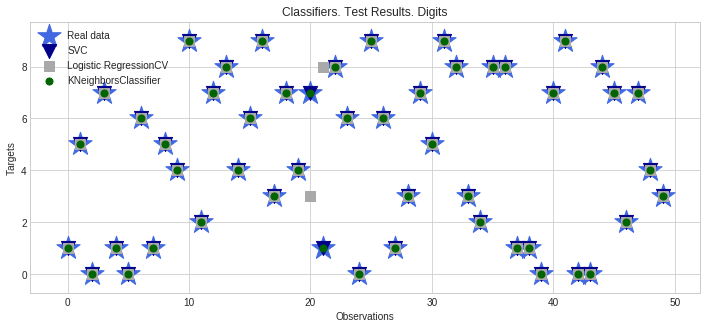

In [28]:
pylab.figure(figsize=(12,5)); n=50; x=range(n)
pylab.scatter(x,y_test3[:n],marker='*',s=600,color='royalblue',label='Real data')
pylab.scatter(x,y_test39[:n],marker='v',s=200,color='darkblue',label='SVC')
pylab.scatter(x,y_test32[:n],marker='s',s=100,color='darkgrey',label='Logistic RegressionCV')
pylab.scatter(x,y_test311[:n],marker='o',s=50,color='darkgreen',label='KNeighborsClassifier')
pylab.xlabel('Observations'); pylab.ylabel('Targets') 
pylab.title('Classifiers. Test Results. Digits')
pylab.legend(loc=2,fontsize=10); pylab.show()

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Supervised Learning. Regression</h1>

In [29]:
regressor_list,regressor_names,reg_datasets=[],[],[]
r2_train,r2_test,ev_train, ev_test,mse_train,mse_test,mae_train,mae_test,mdae_train,mdae_test=\
[],[],[],[],[],[],[],[],[],[]
df_list2=['regressor_name','r2_train','r2_test','ev_train','ev_test',
          'mse_train','mse_test','mae_train','mae_test','mdae_train','mdae_test']
reg=[linear_model.LinearRegression(),linear_model.Ridge(),linear_model.RidgeCV(),
     linear_model.Lasso(),linear_model.LassoLarsCV(),linear_model.RANSACRegressor(),
     linear_model.BayesianRidge(),linear_model.ARDRegression(),
     linear_model.HuberRegressor(),linear_model.TheilSenRegressor(),
     PLSRegression(),DecisionTreeRegressor(),ExtraTreeRegressor(),
     BaggingRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),
     linear_model.PassiveAggressiveRegressor(max_iter=1000,tol=0.001),linear_model.ElasticNet(),
     linear_model.SGDRegressor(max_iter=1000,tol=0.001),svm.SVR(),KNeighborsRegressor(),
     RadiusNeighborsRegressor(radius=1.5),GaussianProcessRegressor()]

In [30]:
list1reg=['LinearRegression','Ridge','RidgeCV','Lasso','LassoLarsCV','RANSACRegressor',
          'BayesianRidge','ARDRegression','HuberRegressor',
          'TheilSenRegressor','PLSRegression','DecisionTreeRegressor',
          'ExtraTreeRegressor','BaggingRegressor','AdaBoostRegressor',
          'GradientBoostingRegressor','RandomForestRegressor']
y1reg=[]; y7reg=[]
for i in range(len(list1reg)):
    y1reg.append(regressor_fit_score(reg[i],list1reg[i],'Boston',X_train1,X_test1,y_train1,y_test1)[:2])
[[y_train101,y_test101],[y_train102,y_test102],[y_train103,y_test103],
 [y_train104,y_test104],[y_train105,y_test105],[y_train106,y_test106],
 [y_train107,y_test107],[y_train108,y_test108],[y_train109,y_test109],
 [y_train110,y_test110],[y_train111,y_test111],[y_train112,y_test112],
 [y_train113,y_test113],[y_train114,y_test114],[y_train115,y_test115],
 [y_train116,y_test116],[y_train117,y_test117]]=y1reg
list7reg=['PassiveAggressiveRegressor','ElasticNet','SGDRegressor','SVR',
          'KNeighborsRegressor','RadiusNeighborsRegressor','GaussianProcessRegressor']
for i in range(len(list7reg)):
    y7reg.append(regressor_fit_score(reg[i],list7reg[i],'Toy Regression',X_train7,X_test7,y_train7,y_test7)[:2])
[[y_train718,y_test718],[y_train719,y_test719],[y_train720,y_test720],[y_train721,y_test721],
 [y_train722,y_test722],[y_train723,y_test723],[y_train724,y_test724]]=y7reg

In [31]:
df_regressor_results=get_regressor_results(); df_regressor_results.to_csv('regressor_results.csv')
df_regressor_results[df_list2].sort_values('r2_test',ascending=False).style.set_properties(**style_dict)

,regressor_name,r2_train,r2_test,ev_train,ev_test,mse_train,mse_test,mae_train,mae_test,mdae_train,mdae_test
23,GaussianProcessRegressor,1,1,1,1,0,0,0,0,0,0
22,RadiusNeighborsRegressor,1,1,1,1,0,0,0,0,0,0
21,KNeighborsRegressor,1,1,1,1,0,0,0,0,0,0
19,SGDRegressor,1,1,1,1,0,0,0.002,0.002,0.0017,0.0017
18,ElasticNet,1,1,1,1,0.0006,0.0006,0.02,0.0199,0.017,0.0166
17,PassiveAggressiveRegressor,1,1,1,1,0,0,0,0,0,0
20,SVR,0.9998,0.9998,0.9998,0.9998,1.9581,1.9245,1.1162,1.1111,0.9505,0.9424
15,GradientBoostingRegressor,0.9779,0.9247,0.9779,0.9252,1.7841,7.4375,1.0462,2.1609,0.8733,1.8446
16,RandomForestRegressor,0.9745,0.9112,0.9746,0.9127,2.0624,8.7744,0.9618,2.2436,0.625,1.605
13,BaggingRegressor,0.978,0.9058,0.978,0.9065,1.7742,9.3096,0.8819,2.3795,0.6,1.72


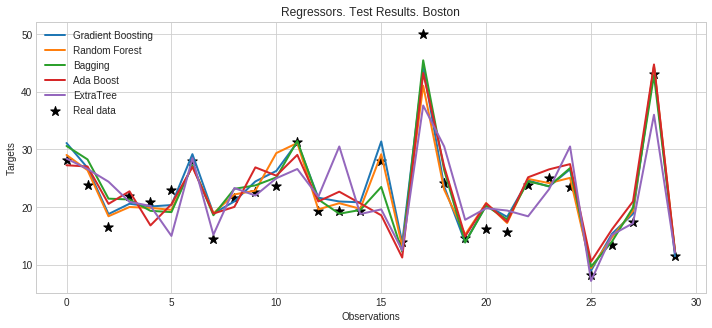

In [32]:
pylab.figure(figsize=(12,5)); n=30; x=range(n)
pylab.scatter(x,y_test1[:n],marker='*',s=100,color='black',label='Real data')
pylab.plot(x,y_test116[:n],lw=2,label='Gradient Boosting'); pylab.plot(x,y_test117[:n],lw=2,label='Random Forest')
pylab.plot(x,y_test114[:n],lw=2,label='Bagging'); pylab.plot(x,y_test115[:n],lw=2,label='Ada Boost')
pylab.plot(x,y_test113[:n],lw=2,label='ExtraTree')
pylab.xlabel('Observations'); pylab.ylabel('Targets'); pylab.title('Regressors. Test Results. Boston')
pylab.legend(loc=2,fontsize=10); pylab.show()

### combining regression with kernels

0.9965915355258274


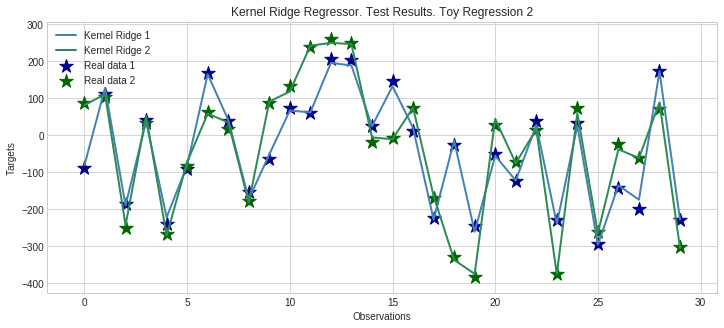

In [33]:
# Kernel Ridge; Toy regression 2
reg25=KernelRidge(); reg25.fit(X_train8,y_train8); y_train825=reg25.predict(X_train8) 
y_test825=reg25.predict(X_test8); print(reg25.score(X_test8,y_test8))
pylab.figure(figsize=(12,5)); n=30; x=range(n)
pylab.scatter(x,y_test8[:n,0],marker='*',s=200,color='darkblue',label='Real data 1')
pylab.scatter(x,y_test8[:n,1],marker='*',s=200,color='darkgreen',label='Real data 2')
pylab.plot(x,y_test825[:n,0],lw=2,color='steelblue',label='Kernel Ridge 1')
pylab.plot(x,y_test825[:n,1],lw=2,color='seagreen',label='Kernel Ridge 2')
pylab.xlabel('Observations'); pylab.ylabel('Targets') 
pylab.title('Kernel Ridge Regressor. Test Results. Toy Regression 2')
pylab.legend(loc=2,fontsize=10); pylab.show()

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Unsupervised learning</h1>

In [34]:
usl=[mixture.GaussianMixture(n_components=4,n_init=4),mixture.BayesianGaussianMixture(n_components=4,n_init=4),
     manifold.Isomap(),manifold.LocallyLinearEmbedding(),manifold.SpectralEmbedding(),manifold.MDS(),manifold.TSNE()]
# Gaussian Mixture; Toy blobs
usl[0].fit(X_train9,y_train9); y_test91=usl[0].predict(X_test9)
usl[1].fit(X_train9,y_train9); y_test92=usl[1].predict(X_test9)

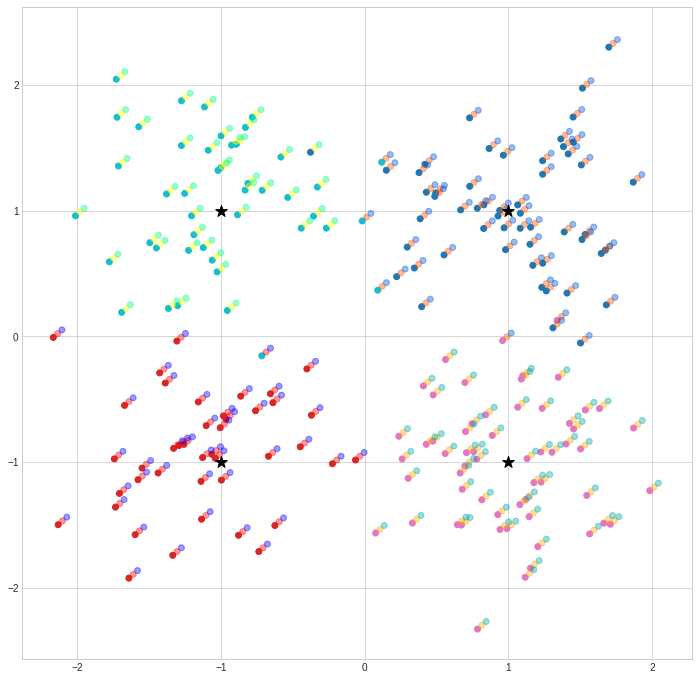

In [35]:
pylab.figure(figsize=(12,12)); pylab.scatter(X_test9[:,0],X_test9[:,1],c=y_test9,cmap=pylab.cm.tab10)
pylab.scatter(X_test9[:,0]+0.03,X_test9[:,1]+0.03,c=y_test91,alpha=0.4,cmap=pylab.cm.autumn)
pylab.scatter(X_test9[:,0]+0.06,X_test9[:,1]+0.06,c=y_test92,alpha=0.4,cmap=pylab.cm.winter)
pylab.scatter([1,-1,1,-1],[1,-1,-1,1],c='black',marker='*',s=150); pylab.show()

<h1 style="color:royalblue; font-family:Ewert; font-size:200%;" class="font-effect-3d">Neural Networks</h1>
### supervised

In [36]:
# Multi-layer Perceptron; Classifier; Digits
nn_clf1=MLPClassifier(hidden_layer_sizes=(512,),max_iter=70,solver='sgd',
                      verbose=1,random_state=1,learning_rate_init=.01)
nn_clf1.fit(X_train3,y_train3); nn_clf1.score(X_train3,y_train3),nn_clf1.score(X_test3,y_test3)

Iteration 1, loss = 6.32245115
Iteration 2, loss = 0.40345160
Iteration 3, loss = 0.18567301
Iteration 4, loss = 0.11457804
Iteration 5, loss = 0.08503822
Iteration 6, loss = 0.07348423
Iteration 7, loss = 0.05662412
Iteration 8, loss = 0.05273783
Iteration 9, loss = 0.04391314
Iteration 10, loss = 0.03620788
Iteration 11, loss = 0.03801262
Iteration 12, loss = 0.02911084
Iteration 13, loss = 0.02615359
Iteration 14, loss = 0.02538807
Iteration 15, loss = 0.02224096
Iteration 16, loss = 0.02030931
Iteration 17, loss = 0.01865935
Iteration 18, loss = 0.01775010
Iteration 19, loss = 0.01648355
Iteration 20, loss = 0.01585530
Iteration 21, loss = 0.01461249
Iteration 22, loss = 0.01422504
Iteration 23, loss = 0.01337695
Iteration 24, loss = 0.01259988
Iteration 25, loss = 0.01190659
Iteration 26, loss = 0.01152053
Iteration 27, loss = 0.01214406
Iteration 28, loss = 0.01080019
Iteration 29, loss = 0.01008233
Iteration 30, loss = 0.00954526
Iteration 31, loss = 0.00908236
Iteration 32, los

(1.0, 0.9916666666666667)

Iteration 1, loss = 1.48157142
Iteration 2, loss = 0.19998997
Iteration 3, loss = 0.11511956
0.7107010090281466


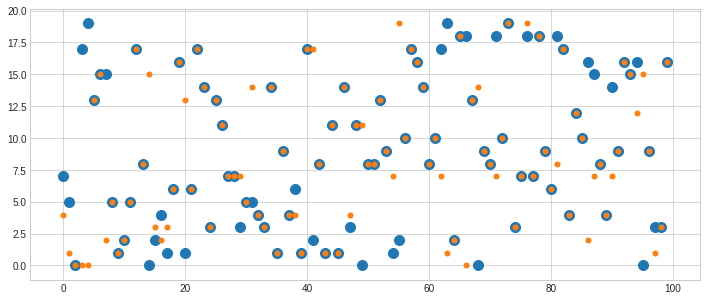

In [37]:
# Multi-layer Perceptron; Classifier; News
nn_clf2=MLPClassifier(hidden_layer_sizes=(128,),max_iter=3,solver='adam',
                      verbose=1,random_state=1,learning_rate_init=.01)
nn_clf2.fit(X_train6,y_train6); print(nn_clf2.score(X_test6,y_test6))
y_test6_predictions=nn_clf2.predict(X_test6)
pylab.figure(figsize=(12,5)); pylab.scatter(range(100),y_test6[:100],s=100)
pylab.scatter(range(100),y_test6_predictions[:100],s=25); pylab.show()

Iteration 1, loss = 1.31810513
Iteration 2, loss = 0.41224114
Iteration 3, loss = 0.33599677
Iteration 4, loss = 0.32411501
Iteration 5, loss = 0.33218928
0.9206


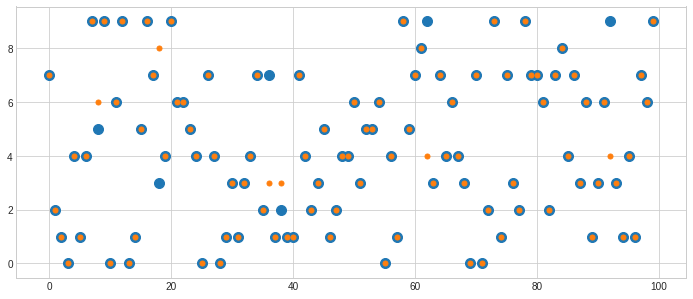

In [38]:
# Multi-layer Perceptron; Classifier; Handwritten digits
nn_clf3=MLPClassifier(hidden_layer_sizes=(256,),max_iter=5,solver='adam',
                      verbose=1,random_state=1,learning_rate_init=.01)
nn_clf3.fit(X_train11.reshape(-1,784),y_train11)
print(nn_clf3.score(X_test11.reshape(-1,784),y_test11))
y_test11_predictions=nn_clf3.predict(X_test11.reshape(-1,784))
pylab.figure(figsize=(12,5)); pylab.scatter(range(100),y_test11[:100],s=100)
pylab.scatter(range(100),y_test11_predictions[:100],s=25); pylab.show()

In [39]:
# Multi-layer Perceptron; Classifier; Handwritten letters
nn_clf4=MLPClassifier(hidden_layer_sizes=(1024,),max_iter=150,solver='sgd',
                      verbose=0,random_state=1,learning_rate_init=.01)
nn_clf4.fit(X_train12.reshape(-1,32*32*3),y_train12)
nn_clf4.score(X_train12.reshape(-1,32*32*3),y_train12),\
nn_clf4.score(X_test12.reshape(-1,32*32*3),y_test12)

(0.5429880197322058, 0.47181113460183227)

In [40]:
# Multi-layer Perceptron; Regressor; Boston
nn_reg1=MLPRegressor(hidden_layer_sizes=(104,),max_iter=1000,solver='lbfgs',alpha=0.015)
nn_reg1.fit(X_train1,y_train1); y_test1_nn1=nn_reg1.predict(X_test1)
nn_reg1.score(X_train1,y_train1),nn_reg1.score(X_test1,y_test1)

(0.8497121856366046, 0.8726776106003362)

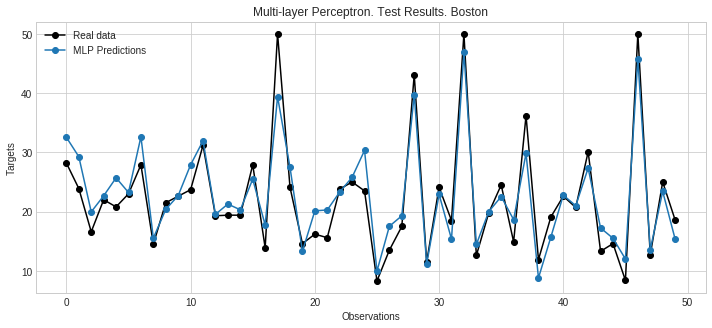

In [41]:
pylab.figure(figsize=(12,5)); n=50; x=range(n)
pylab.plot(x,y_test1[:n],'-o',color='black',label='Real data') 
pylab.plot(x,y_test1_nn1[:n],'-o',label='MLP Predictions')
pylab.xlabel('Observations'); pylab.ylabel('Targets') 
pylab.title('Multi-layer Perceptron. Test Results. Boston')
pylab.legend(loc=2,fontsize=10); pylab.show()

### unsupervised

In [42]:
# Restricted Boltzmann machines; Digits
X_train3_scaled=(X_train3-numpy.min(X_train3,0))/(numpy.max(X_train3,0)+0.0001)
X_test3_scaled=(X_test3-numpy.min(X_test3,0))/(numpy.max(X_test3,0)+0.0001)
logistic=linear_model.LogisticRegression(solver='liblinear',multi_class='ovr',max_iter=50,tol=0.0001,C=5000.0)
brbm=BernoulliRBM(random_state=0,verbose=False); brbm.learning_rate,brbm.n_iter,brbm.n_components=0.05,50,64
nn_clf2=Pipeline(steps=[('brbm',brbm),('logistic',logistic)])
nn_clf2.fit(X_train3_scaled,y_train3)

Pipeline(memory=None,
     steps=[('brbm', BernoulliRBM(batch_size=10, learning_rate=0.05, n_components=64, n_iter=50,
       random_state=0, verbose=False)), ('logistic', LogisticRegression(C=5000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [43]:
print("Logistic regression using BRBM features:\n%s\n"%\
      (classification_report(y_test3,nn_clf2.predict(X_test3_scaled))))

Logistic regression using BRBM features:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.94      0.97        35
           2       0.97      0.97      0.97        36
           3       0.95      1.00      0.98        41
           4       0.95      0.97      0.96        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       0.94      0.92      0.93        37
           8       0.93      0.90      0.91        29
           9       0.94      0.97      0.96        34

   micro avg       0.96      0.96      0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


